In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
data = torch.tensor( iris[iris.columns[0:4]].values ).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [3]:
# basic model
def createModel():

  
  ANN = nn.Sequential(
      nn.Linear(4,64),   
      nn.ReLU(),         
      nn.Linear(64,64),  
      nn.ReLU(),         
      nn.Linear(64,3),   
        )

  
  lossfun = nn.CrossEntropyLoss()

 
  optimizer = torch.optim.SGD(ANN.parameters(),lr=.01)

  return ANN,lossfun,optimizer

In [4]:
X_train,X_test, y_train,y_test = train_test_split(data,labels, train_size=.8)

In [5]:
# training model
numepochs = 200

def trainModel(trainProp):

  
  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  
  for epochi in range(numepochs):

    
    # X_train,X_test, y_train,y_test = train_test_split(data,labels, train_size=trainProp)


    # forward + loss
    yHat = ANN(X_train)
    loss = lossfun(yHat,y_train)
    
    # back
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute training accuracy
    trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )
    
    # test accuracy
    predlabels = torch.argmax( ANN(X_test),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y_test).float()).item() )
  
  
  return trainAcc,testAcc


In [6]:
# create a model
ANN,lossfun,optimizer = createModel()
trainAcc,testAcc = trainModel(.8)


In [7]:
print(np.mean(trainAcc)),print(np.mean(testAcc))

69.52916748821735
69.2833337187767


(None, None)

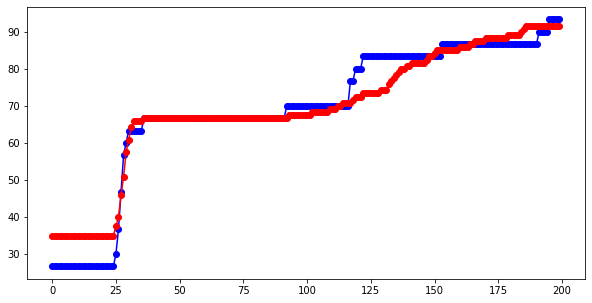

In [8]:
fig = plt.figure(figsize=(10,5))
plt.plot(testAcc,'bo-',label='test')
plt.plot(trainAcc,'ro-',label='train')


The same with DataLoader


In [11]:
# path: scikit train_test_split -> TensorDataset -> DataLoader
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, train_size=.8)


# converted to tensors
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# create a dataloader - batch size of 12
train_loader = DataLoader(train_data,shuffle=True,batch_size=12)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [10]:
for X,y in train_loader:
  print(X.shape,y.shape)

X,y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[5.7000, 3.8000, 1.7000, 0.3000],
         [5.1000, 3.3000, 1.7000, 0.5000],
         [5.0000, 3.4000, 1.6000, 0.4000],
         [4.6000, 3.2000, 1.4000, 0.2000],
         [5.4000, 3.7000, 1.5000, 0.2000],
         [6.9000, 3.2000, 5.7000, 2.3000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [6.0000, 3.4000, 4.5000, 1.6000],
         [6.8000, 3.0000, 5.5000, 2.1000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [5.8000, 4.0000, 1.2000, 0.2000],
         [6.9000, 3.1000, 5.1000, 2.3000]]),
 tensor([0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2]))

Rearranging model

In [12]:
def createNewModel():

  # model architecture
  ANN = nn.Sequential(
      nn.Linear(4,64),   
      nn.ReLU(),        
      nn.Linear(64,64),
      nn.ReLU(),       
      nn.Linear(64,3),  
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANN.parameters(),lr=.01)

  return ANN,lossfun,optimizer

In [14]:
numepochs = 500

# iterating for each epoch and each batch
def trainTheModel():

  
  trainAcc = []
  testAcc  = []

  
  for epochi in range(numepochs):


    # loop over training data batches
    batchAcc = []

    for X,y in train_loader:

      
      yHat = ANN(X)
      loss = lossfun(yHat,y)
      

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    


    
    trainAcc.append( np.mean(batchAcc) )

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANN(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
  
  
  return trainAcc,testAcc

In [15]:
# create a model
ANN,lossfun,optimizer = createNewModel()

# train the model   
trainAcc,testAcc = trainTheModel()

In [16]:
print(np.mean(trainAcc)),print(np.mean(testAcc))

95.82833372682333
95.17333146333695


(None, None)

Dividing sets to train,devset and testset

In [21]:

partitions = [.8,.1,.1]


train_data,testTMP_data, train_labels,testTMP_labels = \
                   train_test_split(data, labels, train_size=partitions[0])


split = partitions[1] / np.sum(partitions[1:])


devset_data,test_data, devset_labels,test_labels = \
              train_test_split(testTMP_data, testTMP_labels, train_size=partitions[1])